<a href="https://colab.research.google.com/github/MonishKoushalBusani/FMML_2024_Projects_and_Lab_Submissionss/blob/main/Module1_Lab_4(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transforming data using linear algebra**



we'll visualize the effect of some simple transformations on a unit square and then visualize it using the MNIST dataset.

Firstly,we import the necessary libraries for numerical computations (NumPy), data visualization (Matplotlib), and working with the MNIST dataset (Keras).
These libraries provide the foundation for performing tasks like loading the MNIST dataset, preprocessing the images, training a model, and evaluating its performance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

The **plotGrid** function provides a visual representation of the coordinate system defined by the **transform** matrix.
The **plotData** function visualizes the data points in **X** and their corresponding labels in **y**.

In [2]:
def plotGrid(transform, unit, linestyle=":", fig=None, ax=None):
    lim1 = -100
    lim2 = 100

    def mat2xy(start, end):
        if len(start.shape) == 1:
            start = np.expand_dims(start, 0)
            end = np.expand_dims(end, 0)
        nan = np.ones(len(start)) * np.nan
        x = np.stack((start[:, 0], end[:, 0], nan)).T.reshape(-1)
        y = np.stack((start[:, 1], end[:, 1], nan)).T.reshape(-1)
        return x, y

    def parallellines(axis, addend, lines, unit):
        addend = np.repeat(np.expand_dims(addend, 0), lines * 2, 0)
        unit = np.expand_dims(np.arange(-lines, lines) * unit, 1)
        unit = unit - lines
        addend = addend * unit
        lines = np.expand_dims(axis, 0) + addend
        return np.concatenate((lines, lines * -1))

    if fig is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    transform = transform.astype(float)
    xaxis = transform[0]
    yaxis = transform[1]

    lines1 = parallellines(xaxis * lim1, yaxis, 100, unit)
    lines2 = parallellines(xaxis * lim2, yaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot x axis
    x, y = mat2xy(xaxis * lim1, xaxis * lim2)
    plt.plot(x, y, linestyle, color="#440077")

    lines1 = parallellines(yaxis * lim1, xaxis, 100, unit)
    lines2 = parallellines(yaxis * lim2, xaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot y axis
    x, y = mat2xy(yaxis * lim1, yaxis * lim2)
    plt.plot(x, y, linestyle, color="#aa5500")

    return fig, ax


def plotData(X, y, xlabel="hole", ylabel="bound", fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    for ii in range(nclasses):
        plt.scatter(X[y == ii, 0], X[y == ii, 1])
    plt.legend([str(i) for i in range(nclasses)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    lim2 = X.max()
    lim1 = X.min()
    return fig, ax

**Matrix transformations on data**

Matrix transformations are fundamental operations in machine learning, particularly for tasks involving linear algebra. They provide a powerful way to manipulate and analyze data.

**Common Matrix Transformations**:

Rotation,Scaling,Translation,Shear,Projection.

**Applications in Machine Learning**:

Image Processing,Feature Engineering,Neural Networks,Dimensionality Reduction,Natural Language Processing.





In [5]:
T0 = np.array([[2, 0], [0, 2]])
T1 = np.array([[2, 0], [-2, 4]])

data1 = np.array([8,5])
data0 = np.matmul(T1, data1)

print("Data in T0 = ", data0)
print("Data in T1 = ", data1)

Data in T0 =  [16  4]
Data in T1 =  [8 5]


Let's visualize it

T0 -> dotted lines

T1 -> solid lines

This code generates a plot with two sets of grids representing the coordinate systems defined by the transformation matrices **T1** and **T0**. It then **superimposes** a single data point on top of these grids. By **hiding** the tick marks and labels, it focuses on the **visualization** of the **grids** and the **data** **point**.

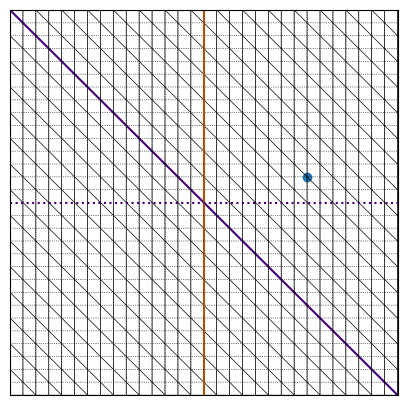

In [7]:
fig, ax = plotGrid(T1.T, 1, "-")
plotGrid(T0.T, 1, fig=fig, ax=ax)

plt.scatter(data0[0], data0[1])
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In T0 (dotted lines), the position is [16,4] where it is [8,5] in T1

We can achieve the same thing by post-multiplying the transpose of the transformation matrix to the data. This will come in handy when transforming multiple data points at once:

In [8]:
data0_a = np.matmul(T1, data1)
data0_b = np.matmul(data1, T1.T)
print(data0_a)
print(data0_b)

[16  4]
[16  4]


Data transformations cause the distance between data points to change. This will affect distance-based algorithms such as nearest neighbour

let us define 3 points in T1 and observe distance between them in t1 and t0

In [9]:
A1 = np.array([7, 7])
B1 = np.array([1, -4])
C1 = np.array([9, -9])

A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)


def dist(a, b):
    diff = a - b
    sq = diff * diff
    return np.sqrt(sq.sum())


print("Distance between A and B in T1 = ", dist(A1, B1))
print("Distance between B and C in T1 = ", dist(B1, C1))
print("Distance between A and C in T1 = ", dist(A1, C1))

print("")
print("Distance between A and B in T0 = ", dist(A0, B0))
print("Distance between B and C in T0 = ", dist(B0, C0))
print("Distance between A and C in T0 = ", dist(A0, C0))

Distance between A and B in T1 =  12.529964086141668
Distance between B and C in T1 =  9.433981132056603
Distance between A and C in T1 =  16.1245154965971

Distance between A and B in T0 =  34.17601498127012
Distance between B and C in T0 =  39.395431207184416
Distance between A and C in T0 =  68.11754546370561


We can obseve that

In T1, B and C are the closest
whereas in T0, A and B are the closest

These kinds of changes will affect the predictions returned by the nearest neighbour algorithm.

**Transformations on MNIST**

Let us experiment with a subset of the MNIST dataset. We will extract two features from the database for our experiment. We will then transform the data using a transformation matrix and visualize the data in the new coordinate system.

The code defines several functions for nearest neighbor classification, image processing, and boundary extraction.

**Nearest Neighbor Classification:**

NN1(traindata, trainlabel, query): This function implements the nearest neighbor algorithm for a single query point. It calculates the Euclidean distance between the query point and each training point, finds the closest training point, and returns its corresponding label.

NN(traindata, trainlabel, testdata): This function applies the NN1 function to each test point and returns the predicted labels for the entire test set.

**Image Processing:**

cumArray(img),getHolePixels(img),getHullPixels(img),minus(a, b),getBoundaryPixels(img)

**Evaluation:**

Accuracy(gtlabel, predlabel): This function calculates the accuracy of a classifier by comparing the predicted labels to the ground truth labels.

In [10]:
def NN1(traindata, trainlabel, query):

    diff = (
        traindata - query
    )
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):

    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):

    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()
    return correct / len(gtlabel)


def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    img2 = img2 > 0
    return img2


def getHolePixels(img):

    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    hole = hull & ~(img > 0)
    return hole


def getHullPixels(img):

    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    return hull


def minus(a, b):

    return a & ~b


def getBoundaryPixels(img):

    img = img.copy() > 0
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

In [11]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

nclasses = 4

train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

train_X = train_X[::150].copy()
train_y = train_y[::150].copy()  # do the same to the labels

test_X = test_X[::150].copy()
test_y = test_y[::150].copy()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


 Below code extracts features related to the shape and structure of the images. These features can then be used as input to a machine learning model for classification or other tasks

In [13]:
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])

train_feats = np.vstack(
    (train_hole, train_bound)).transpose()
test_feats = np.vstack(
    (test_hole, test_bound)).transpose()

Let us plot the samples and observe results

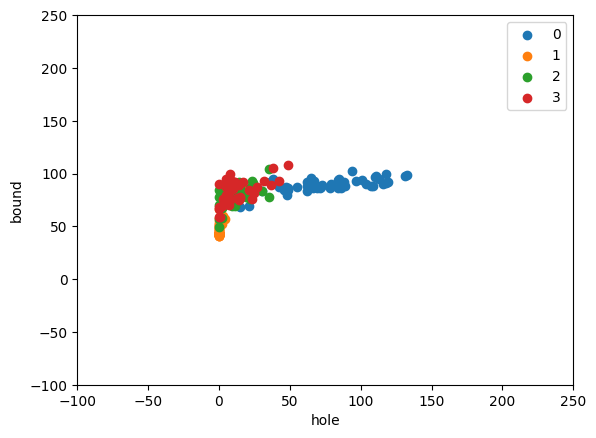

In [19]:
xlim = [-100, 250]
ylim = [-100, 250]
fig, ax = plotData(train_feats, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

Lets test Baseline-Accuracy

In [20]:
test_pred = NN(train_feats, train_y, test_feats)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 53.57142857142857 % for 4 classes


Let us try transforming the features and checking their accuracy.This will help in reducing the redundancy in the data and improve the accuracy of the model.

In [21]:
transform = np.array([[0.5, -0.5], [0, 2.5]])
print(transform)

train_feats_t = np.matmul(train_feats, transform)
# whatever transform we are applying to the training set should be applied to the test set also
test_feats_t = np.matmul(test_feats, transform)

[[ 0.5 -0.5]
 [ 0.   2.5]]


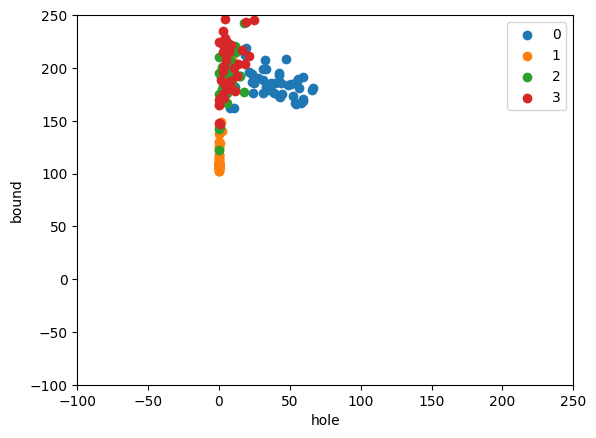

In [22]:
fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [23]:
test_pred = NN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 64.28571428571429 % for 4 classes


In [25]:
transform = np.array([[0.75, -0.75], [0, 4.5]])
print(transform)

train_feats_t = np.matmul(train_feats, transform)
test_feats_t = np.matmul(test_feats, transform)

[[ 0.75 -0.75]
 [ 0.    4.5 ]]


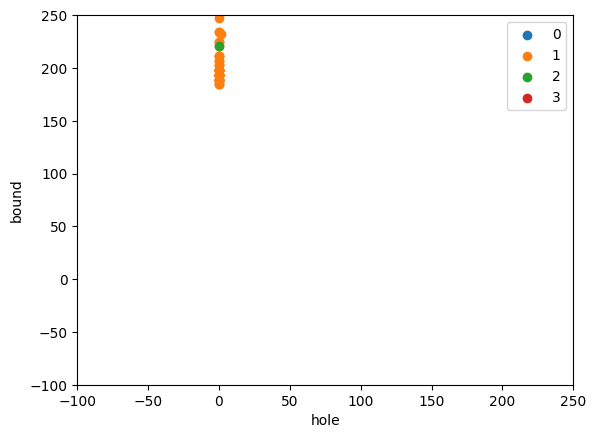

In [26]:
fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [27]:
test_pred = NN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 67.85714285714286 % for 4 classes


In [28]:
transform = np.array([[0.25, -0.25], [0, 2]])
print(transform)

train_feats_t = np.matmul(train_feats, transform)
test_feats_t = np.matmul(test_feats, transform)

[[ 0.25 -0.25]
 [ 0.    2.  ]]


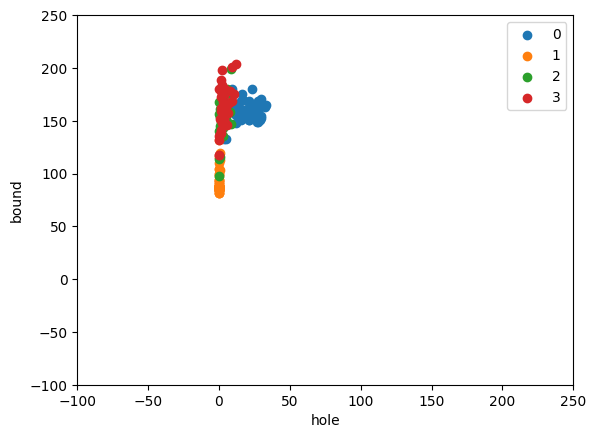

In [29]:
fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [30]:
test_pred = NN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 67.85714285714286 % for 4 classes


In [31]:
transform = np.array([[0.10, -0.10], [0, 1]])
print(transform)

train_feats_t = np.matmul(train_feats, transform)
test_feats_t = np.matmul(test_feats, transform)

[[ 0.1 -0.1]
 [ 0.   1. ]]


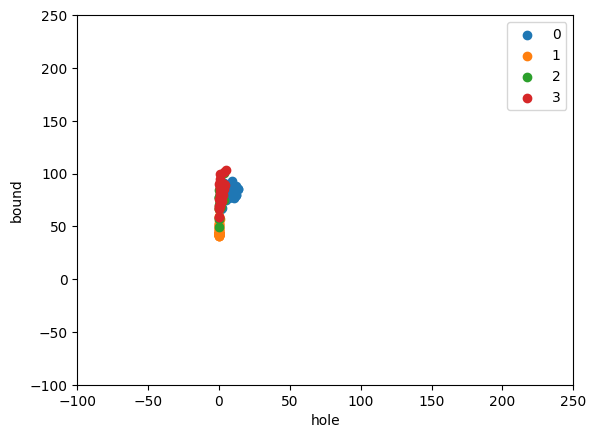

In [32]:
fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [33]:
test_pred = NN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 67.85714285714286 % for 4 classes


By this data transformation techniques our accuracy incresed from 53 to 67%

## **Data normalization**

Data normalization is a crucial preprocessing step in machine learning, particularly when dealing with numerical data. It transforms raw data into a standard format, ensuring that all features contribute equally to the model's learning process.

**Key Features:**

Feature Scaling,Improved Model Convergence, Enhanced Model Performance

**Common Normalization Techniques:**

Min-Max Scaling,
Z-score Standardization,
Robust Scaling,
Decimal Scaling

In [34]:
def rescale(data):
    return (data - data.min()) / (data.max() - data.min())

We have to apply the rescaling to each feature individually. Also remember to apply the same transform we are using on the train set to the test set.

In [38]:
train_feats_rescaled_x = rescale(train_feats[:, 0])
train_feats_rescaled_y = rescale(train_feats[:, 1])
train_feats_rescaled = np.stack((train_feats_rescaled_x, train_feats_rescaled_y), 1)

test_feats_rescaled_x = rescale(test_feats[:, 0])
test_feats_rescaled_y = rescale(test_feats[:, 1])
test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y), 1)

Lets Plot them...

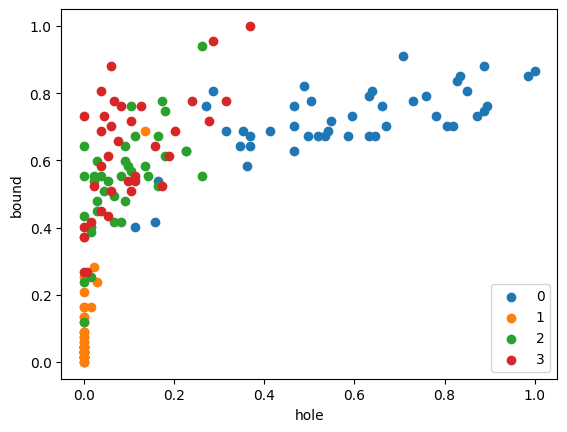

In [39]:
fig, ax = plotData(train_feats_rescaled, train_y)

Here, rescaling makes all the features between 0 and 1.

Let's test accuracy

In [40]:
test_pred = NN(train_feats_rescaled, train_y, test_feats_rescaled)
acc = Accuracy(test_y, test_pred)
print("Accuracy after transform:", acc*100, "%")

Accuracy after transform: 60.71428571428571 %


The Accuracy got slightly increased than previous one.